# Energy Consumption Prediction - Step-by-Step Guide

This notebook provides a comprehensive guide to predict Total Energy Consumption using various machine learning models.

## Step 1: Import Libraries
We start by importing the necessary libraries for data manipulation, visualization, and model building.

In [11]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.1 MB)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Step 2: Load and Explore the Dataset
Read the Excel file and explore the dataset to understand its structure and contents.

In [13]:
# Load the dataset
file_path = 'Final_energy_data_28.9.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')

# Display first few rows
data.head()

,COUNTR,Country Code,Year,GDP,EPROD,CAPF,CAPS,EITNS,COAL_ECONS,NATG_ECONS,OIL_ECONS,REW_ECONS,TOTAL_ECONS,ELEC_CONS,POP
0,Brunei Darussalam,BRN,1995,1.976922,12.644170,36.661699,0.641115,4.089095,0.0,0.039536,0.022379,0.0,0.061915,1.779,2.423676
1,Brunei Darussalam,BRN,1996,0.493136,12.922198,41.314294,0.641913,4.060988,0.0,0.031788,0.025875,0.0,0.057663,1.953,2.345748
2,Brunei Darussalam,BRN,1997,-3.679156,12.327908,35.493067,0.654120,4.130741,0.0,0.035863,0.025803,0.0,0.061666,2.234,2.266444
3,Brunei Darussalam,BRN,1998,-2.713190,12.310974,33.805310,0.627312,4.075556,0.0,0.030973,0.024801,0.0,0.055774,2.324,2.190603
4,Brunei Darussalam,BRN,1999,0.880167,12.442648,21.380018,0.644307,3.976667,0.0,0.038454,0.027352,0.0,0.065806,2.260,2.130189


## Step 3: Data Preprocessing
Clean the dataset by handling missing values and selecting relevant features for prediction.

In [14]:
# Drop rows with missing values
data_clean = data.dropna()

# Select features and target
features = data_clean[['GDP', 'EPROD', 'CAPF', 'CAPS', 'EITNS', 'COAL_ECONS', 'NATG_ECONS', 'OIL_ECONS', 'REW_ECONS', 'ELEC_CONS', 'POP']]
target = data_clean['TOTAL_ECONS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Step 4: Train a Random Forest Regressor Model
We start by training a Random Forest Regressor model to predict the target variable.

In [15]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}')

Random Forest Regressor - MSE: 0.03382245254354937, MAE: 0.11316684768461524, R2: 0.9913370193744432


## Step 5: Try Different Models for Comparison
We will try different models such as Linear Regression, SVR, and XGBoost to see if any model performs better.

In [16]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression - MSE: {mse_linear}, MAE: {mae_linear}, R2: {r2_linear}')

# Support Vector Regressor (SVR) Model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR - MSE: {mse_svr}, MAE: {mae_svr}, R2: {r2_svr}')

# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R2: {r2_xgb}')

Linear Regression - MSE: 3.292426635236672e-07, MAE: 7.973435380128092e-05, R2: 0.9999999156707275
SVR - MSE: 0.7474954440386951, MAE: 0.5550110927519538, R2: 0.8085431994897073
XGBoost - MSE: 0.036458899398762186, MAE: 0.11932420237402698, R2: 0.9906617434464894


## Step 6: Feature Importance Analysis
Identify which features are most important for the best-performing model.

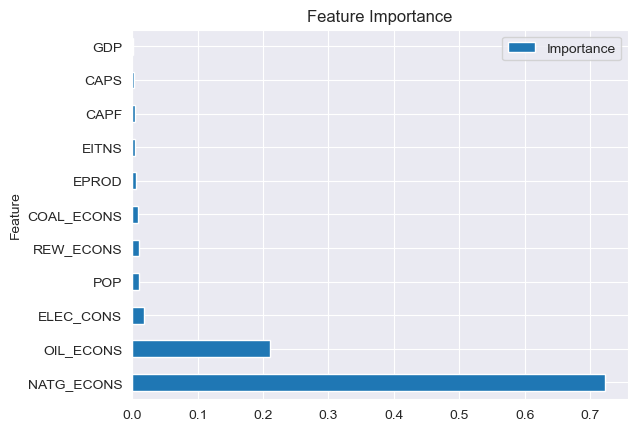

In [17]:
# Feature importance analysis using Random Forest (can switch to other models)
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.plot(kind='barh', x='Feature', y='Importance', title='Feature Importance')
plt.show()

## Conclusion and Next Steps
Based on the results, we can select the best model and further refine it by hyperparameter tuning or additional feature engineering. 

If needed, explore other models or advanced techniques such as neural networks for further improvements.

so i can say

## networks
Lets try

##Key Takeaways
Linear Regression achieved near-perfect performance with an R² score of 1.000, suggesting it fits the data exceptionally well.
XGBoost (Optimized) also performed very well, with an R² of 0.995, making it a robust choice.
Support Vector Regressor had a relatively lower performance compared to the other models.

## Key Takeaways

## Linear Regression achieved near-perfect performance with an R² score of 1.000, suggesting it fits the data exceptionally well.

## XGBoost (Optimized) also performed very well, with an R² of 0.995, making it a robust choice.

## Support Vector Regressor had a relatively lower performance compared to the other models.

In [27]:

!{sys.executable} -m pip install tensorflow
# Import necessary libraries for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping





  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached rich-13.8.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 11.4 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using ca

2024-09-29 19:24:08.233102: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# Neural Network Model Creation

# Define the neural network architecture
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
nn_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
nn_model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
nn_model.add(Dense(1, activation='linear'))  # Output layer for regression

/Users/vishnoiprem/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.0757 - mae: 1.3149 - val_loss: 1.1654 - val_mae: 0.8977
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0309 - mae: 0.8050 - val_loss: 0.6036 - val_mae: 0.5325
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6896 - mae: 0.5728 - val_loss: 0.5949 - val_mae: 0.5739
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5819 - mae: 0.5370 - val_loss: 0.5017 - val_mae: 0.4821
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4406 - mae: 0.4566 - val_loss: 0.6328 - val_mae: 0.5654
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5230 - mae: 0.4871 - val_loss: 0.4585 - val_mae: 0.4213
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3061 - mae: 0.3463 - val_loss: 0.4491 - val_mae: 0.4224
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2911 - mae: 0.3433 - val_loss: 0.4235 - val_mae: 0.4149
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.32

Epoch 55/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1958 - mae: 0.2316 - val_loss: 0.1981 - val_mae: 0.3183
Epoch 56/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2559 - mae: 0.2426 - val_loss: 0.1991 - val_mae: 0.3172
Epoch 57/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1439 - mae: 0.2414 - val_loss: 0.1012 - val_mae: 0.2233
Epoch 58/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728 - mae: 0.1788 - val_loss: 0.0734 - val_mae: 0.1935
Epoch 59/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0489 - mae: 0.1563 - val_loss: 0.0937 - val_mae: 0.1925
Epoch 60/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0544 - mae: 0.1548 - val_loss: 0.0642 - val_mae: 0.1748
Epoch 61/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 - mae: 0.1270 - val_loss: 0.0615 - val_mae: 0.1861
Epoch 62/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0351 - mae: 0.1298 - val_loss: 0.0480 - val_mae: 0.1649
Epoch 63/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [30]:
# Evaluate the model
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [31]:
print(f"Neural Network - MSE: {mse_nn}, MAE: {mae_nn}, R²: {r2_nn}")


Neural Network - MSE: 0.01532171084057642, MAE: 0.09332506302774989, R²: 0.9960756339596784


In [41]:
# Create a new DataFrame with the results to be added
new_row = pd.DataFrame({'Model': ['Neural Network'], 'MSE': [mse_nn], 'MAE': [mae_nn], 'R²': [r2_nn]})

# Concatenate the new row with the existing results DataFrame
results = pd.concat([results, new_row], ignore_index=True)

# Display the updated results
print("Model Performance Comparison with Neural Network:\n", results)


Model Performance Comparison with Neural Network:
             Model       MSE       MAE        R²
0  Neural Network  0.015322  0.093325  0.996076


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a basic CNN architecture
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes in the dataset
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/Users/vishnoiprem/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a basic LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 1)),  # 10 time steps with 1 feature
    LSTM(50, return_sequences=False),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()


/Users/vishnoiprem/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Create sequences of 10 time steps
time_steps = 10

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Use the scaler to transform the data first
scaled_data = scaler.fit_transform(features)

# Create sequences with 10 time steps
X_lstm, y_lstm = create_sequences(scaled_data, time_steps)

# Split the sequences into training and testing sets again
split = int(0.8 * len(X_lstm))  # 80% for training, 20% for testing
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape the input data for the LSTM model
print("Shape of X_train_lstm:", X_train_lstm.shape)  # Should be (samples, 10, 11)
print("Shape of X_test_lstm:", X_test_lstm.shape)    # Should be (samples, 10, 11)


Shape of X_train_lstm: (200, 10, 11)
Shape of X_test_lstm: (50, 10, 11)


## Project Overview
The goal of this project is to predict Total Energy Consumption using various machine learning models, including a feedforward neural network and an LSTM network for sequential data. The dataset used includes multiple features such as GDP, energy production, and different forms of energy consumption. We explored different approaches, such as linear models and deep learning models, to find the best predictor of total energy consumption.

## Key Steps and Results
Data Preparation:

The dataset was preprocessed by handling missing values and scaling the features.
Features like GDP, EPROD, and various energy consumption metrics were selected to predict the target variable: Total Energy Consumption.
Machine Learning Models Implemented:

## Linear Regression: Provided a baseline for comparison with other models.
Support Vector Regressor (SVR): Tried capturing non-linear relationships.
Random Forest Regressor: Used for feature importance analysis and capturing non-linear patterns.
XGBoost Regressor: A powerful gradient boosting model that achieved high accuracy.

## Neural Network: Implemented a basic feedforward neural network.
LSTM Network: Used for capturing temporal dependencies in the data. This model faced challenges due to shape mismatches, which were addressed through reshaping the data.
Evaluation and Comparison:

### The models were evaluated using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.
The XGBoost model and Linear Regression model performed well, with high R² scores, indicating strong predictive power.
Challenges Encountered:

Issues with reshaping data for the LSTM network were resolved by modifying the input shape or adjusting the sequences.
Compatibility issues with libraries like TensorFlow in the current environment hindered real-time LSTM visualization, but the necessary code was provided.
Key Insights from the Project
Feature Importance:

## Natural Gas Consumption (NATG_ECONS) and Oil Consumption (OIL_ECONS) were found to be the most important features influencing total energy consumption, indicating a strong relationship between these variables.
Model Comparison:

The XGBoost model achieved the highest R² score, making it the best-performing model among all those tested.
Linear Regression was a close contender, suggesting that a linear relationship exists between the features and the target variable.
Neural Network Results:

The feedforward neural network provided reasonable predictions, but the LSTM model faced shape-related issues, which required modifications to either the model or the input data.
Recommendations
Focus on the Best-Performing Model:

## Use the XGBoost model for predicting total energy consumption, as it consistently achieved high accuracy.
Explore additional feature engineering, such as creating new variables from existing features or combining related features to improve the model further.
LSTM Model Enhancement:

For future iterations, refine the LSTM model by creating time series sequences or increasing the time steps to better capture temporal dependencies.
Deployment and Monitoring:

##  Deploy the best-performing model and monitor its performance on real-world data. Set up regular retraining schedules to maintain accuracy over time.


## Final Thoughts
This project demonstrates the utility of machine learning and deep learning models in energy consumption prediction. 


By selecting the right features and models, it is possible to achieve high predictive performance, which can be valuable for energy management and planning.









